In [8]:
import pandas as pd

filtered_df = pd.read_csv('../eureka-rebus/verbalized_rebus.csv')
filtered_df.head()

,FRASE,PRIMALET,AUTORE,RIVISTA,MESE,ANNO,TIPO,NOTE,WORDS_PRIMALET,LETTERS_PRIMALET,DIAGRAMMA_FRASE,FRASE_SEPARATED,VERBALIZED_PRIMALET,VERBALIZED_PRIMALET_WITH_LEN
0,Non vi sono difficoltà a l'amore sincero,N O N - viso - nodi - F fico - L T A A L - amo...,-,RPC,0,1869,NaN,NaN,viso nodi fico amo in cero,N O N F L T A A L R E S,3 2 4 10 1 1 ' 5 7,Non vi sono difficoltà a l ' amore sincero,"N O N [Volto, faccia] [Possono essere scorsoi]...","N O N [Volto, faccia (4)] [Possono essere scor..."
1,Amor che nella mente mi ragiona,A M orche - nella M Ente mira Giona,Venga Modestino,GAI,9,1877,NaN,NaN,orche nella Ente mira Giona,A M M,4 3 5 5 2 7,Amor che nella mente mi ragiona,A M [Possono essere assassine] [In + la] M [È ...,A M [Possono essere assassine (5)] [In + la (5...
2,L'esempio val più di tante parole vane,lese M - pio V - Alpi U - dita NT - epa RO - l...,Jo Gabin,REB,63,1889,NaN,NaN,lese pio Alpi dita epa leva,M V U N T R O N E,1 ' 7 3 3 2 5 6 4,L ' esempio val più di tante parole vane,[Ferite] M [Nome di papi] V [Le sovrasta il Mo...,[Ferite (4)] M [Nome di papi (3)] V [Le sovras...
3,Risolutivi test,riso L - ut I - vite ST,-,REL,1,2010,NaN,NaN,riso ut vite,L I S T,10 4,Risolutivi test,[Ingrediente per le crocchette] L [L'antica no...,[Ingrediente per le crocchette (4)] L [L'antic...
4,Colore politico,colo R - E poli - tic O,-,REL,1,2010,NaN,NaN,colo poli tic,R E O,6 8,Colore politico,[Licia della tivù] R E [Le estremità della cal...,[Licia della tivù (4)] R E [Le estremità della...


Length Bin
4-6 (5726 words)    5726
7+ (2631 words)     2631
1-3 (603 words)      603
Name: count, dtype: int64


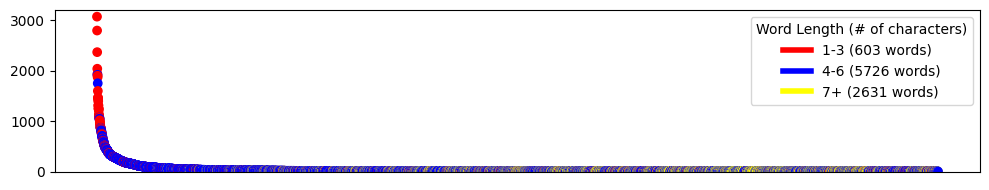

In [4]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

# Split the words and count their occurrences
word_list = ' '.join([x for x in filtered_df['WORDS_PRIMALET'] if isinstance(x, str)]).split()
word_counts = Counter(word_list)

# Create a DataFrame for the word counts
word_counts_df = pd.DataFrame(word_counts.items(), columns=['Word', 'Count'])

# Sort the DataFrame by 'Count' in descending order
word_counts_df = word_counts_df.sort_values(by='Count', ascending=False).reset_index(drop=True)

def bin_word_length(word):
    length = len(word)
    if length <= 3:
        return '1-3 (603 words)'
    elif length <= 6:
        return '4-6 (5726 words)'
    else:
        return '7+ (2631 words)'

word_counts_df['Length Bin'] = word_counts_df['Word'].apply(bin_word_length)

print(word_counts_df['Length Bin'].value_counts())

color_map = {
    '1-3 (603 words)': 'red',
    '4-6 (5726 words)': 'blue',
    '7+ (2631 words)': 'yellow',
}

# Assign colors to each word based on its length bin
word_counts_df['Color'] = word_counts_df['Length Bin'].map(color_map)

# Create a bar plot with matplotlib
plt.figure(figsize=(10, 2))
plt.scatter(word_counts_df['Word'], word_counts_df['Count'], c=list(word_counts_df['Color']))
plt.xticks([])
plt.ylim(0,3200)
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], color=color, lw=4, label=bin_label) for bin_label, color in color_map.items()]
plt.legend(title='Word Length (# of characters)', loc='upper right', handles=legend_elements)

# Display the plot
plt.tight_layout()
plt.show()

Length Bin
7-9 (25799 words)    25799
4-6 (11330 words)    11330
10+ (4705 words)      4705
1-3 (724 words)        724
Name: count, dtype: int64


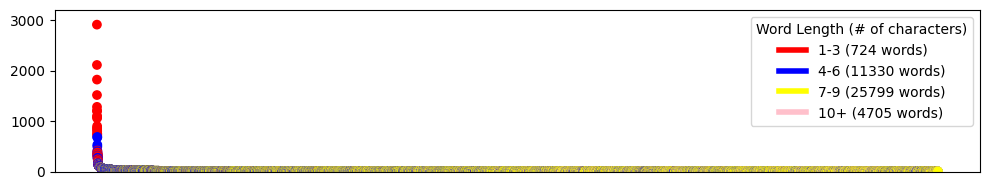

In [5]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import string

# Split the words and count their occurrences
word_list = [w for x in filtered_df['FRASE_SEPARATED'] for w in x.split() if w not in string.punctuation]
word_counts = Counter(word_list)

# Create a DataFrame for the word counts
word_counts_df = pd.DataFrame(word_counts.items(), columns=['Word', 'Count'])

# Sort the DataFrame by 'Count' in descending order
word_counts_df = word_counts_df.sort_values(by='Count', ascending=False).reset_index(drop=True)

def bin_word_length(word):
    length = len(word)
    if length <= 3:
        return '1-3 (724 words)'
    elif length <= 6:
        return '4-6 (11330 words)'
    elif length <= 10:
        return '7-9 (25799 words)'
    else:
        return '10+ (4705 words)'

word_counts_df['Length Bin'] = word_counts_df['Word'].apply(bin_word_length)

print(word_counts_df['Length Bin'].value_counts())

color_map = {
    '1-3 (724 words)': 'red',
    '4-6 (11330 words)': 'blue',
    '7-9 (25799 words)': 'yellow',
    '10+ (4705 words)': 'pink'
}

# Assign colors to each word based on its length bin
word_counts_df['Color'] = word_counts_df['Length Bin'].map(color_map)

# Create a bar plot with matplotlib
plt.figure(figsize=(10, 2))
plt.scatter(word_counts_df['Word'], word_counts_df['Count'], c=list(word_counts_df['Color']))
plt.xticks([])
plt.ylim(0,3200)
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], color=color, lw=4, label=bin_label) for bin_label, color in color_map.items()]
plt.legend(title='Word Length (# of characters)', loc='upper right', handles=legend_elements)

# Display the plot
plt.tight_layout()
plt.show()

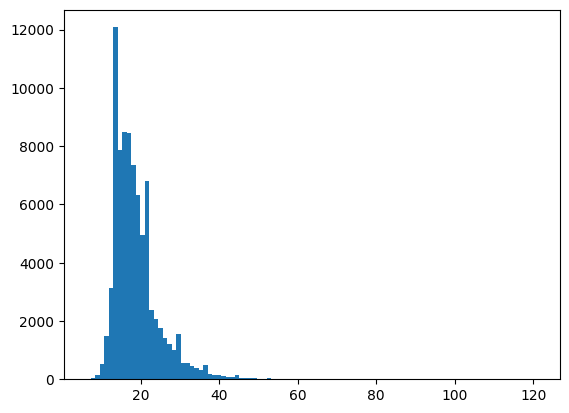

In [14]:
filtered_df["FRASE_NUM_CHARS"] = filtered_df["FRASE"].apply(len)
filtered_df["IDX"] = list(filtered_df.index)
filtered_df = filtered_df.sort_values(by='FRASE_NUM_CHARS', ascending=True).reset_index(drop=True)
filtered_df.index = pd.cut(filtered_df.index, bins=100)
fig = plt.hist(filtered_df['FRASE_NUM_CHARS'], bins=100)